Confusion Matrix:
[[791  22]
 [243 353]]

Accuracy: 0.8119233498935415
Precision: 0.9413333333333334
Recall: 0.5922818791946308
F1-Score: 0.7270854788877446


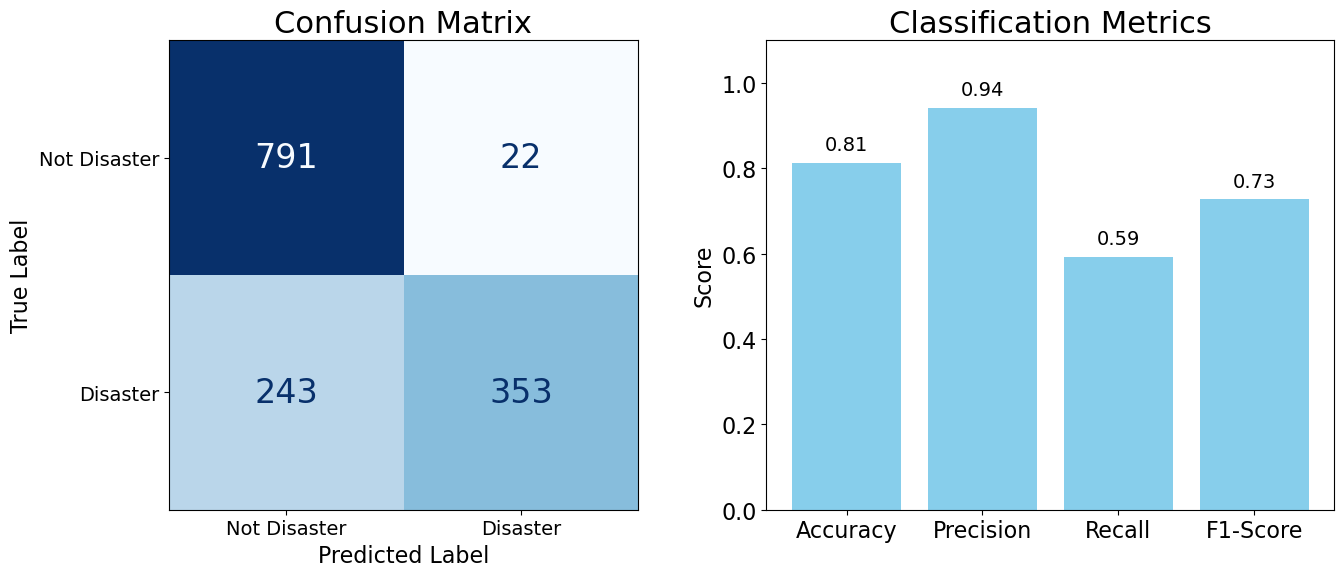

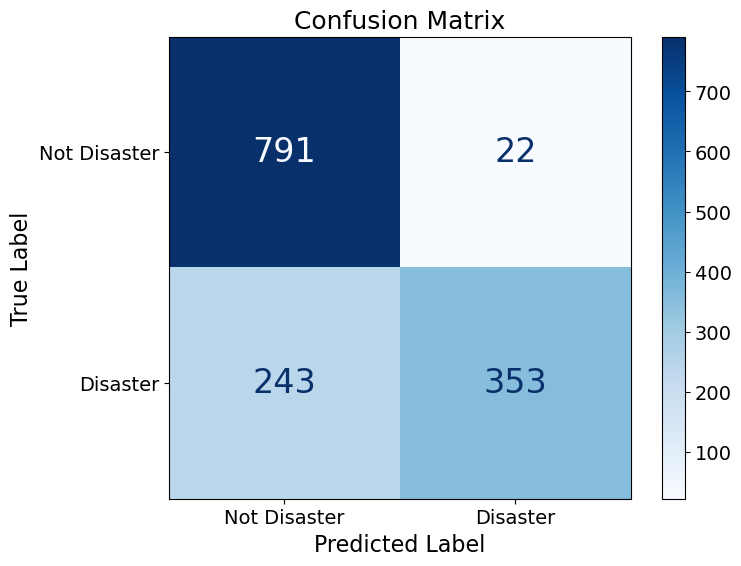

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# Extract directory name for use in filenames
directory_name = os.path.basename(os.path.dirname(os.path.abspath(r"*.csv_path")))

# Load the CSV file
csv_path = f'{directory_name}_classified_tweets.csv'
df = pd.read_csv(csv_path)



# Assuming the CSV contains 'classification' and 'true_label'
y_true = df['true_label']
y_pred = df['classification']

# Evaluation metrics
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Global font size
plt.rcParams.update({'font.size': 14})

# --- Combined CM + Metrics ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix subplot
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Disaster", "Disaster"])
disp.plot(cmap='Blues', ax=axes[0], values_format='d', colorbar=False)
axes[0].set_title("Confusion Matrix", fontsize=22)
axes[0].set_xlabel("Predicted Label", fontsize=16)
axes[0].set_ylabel("True Label", fontsize=16)
for text in disp.text_.ravel():
    text.set_fontsize(24)

# Metrics subplot
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
bars = axes[1].bar(metrics.keys(), metrics.values(), color='skyblue')
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.03, f"{height:.2f}", ha='center', fontsize=14)
axes[1].set_ylim(0, 1.1)
axes[1].set_title("Classification Metrics", fontsize=22)
axes[1].set_ylabel("Score", fontsize=16)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.savefig(f"{directory_name}_CMCM.pdf")
plt.show()

# --- Standalone Confusion Matrix ---
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Disaster", "Disaster"])
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
for text_element in disp.text_.ravel():
    text_element.set_fontsize(24)

plt.savefig(f"{directory_name}_CM.pdf")
plt.show()
